# STock Pirce analysis of Western Asset Intermediate Muni Fund Inc. (SBI) using Time Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('SBI.csv')
df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-12,10.02,10.05,9.97,9.99,8.137659,47200
1,2015-10-19,10.04,10.11,9.88,9.97,8.121362,39300
2,2015-10-26,9.98,10.22,9.93,10.07,8.235969,81900
3,2015-11-02,10.05,10.10,9.82,9.83,8.039680,98800
4,2015-11-09,9.81,10.10,9.76,10.05,8.219609,110600
5,2015-11-16,10.05,10.13,9.91,10.00,8.178720,97900
6,2015-11-23,9.89,10.09,9.89,10.01,8.219872,50600
7,2015-11-30,10.06,10.09,9.95,9.95,8.170605,124600
8,2015-12-07,9.98,10.15,9.85,9.92,8.145967,101000
9,2015-12-14,9.97,10.71,9.86,10.05,8.252722,122500


In [4]:
df.drop(columns=['Open', 'Low', 'Volume','Adj Close' ], inplace= True)

In [5]:
df.head()

,Date,High,Close
0,2015-10-12,10.05,9.99
1,2015-10-19,10.11,9.97
2,2015-10-26,10.22,10.07
3,2015-11-02,10.10,9.83
4,2015-11-09,10.10,10.05


In [6]:
df.drop(columns='High', inplace= True)

In [7]:
df.head()

,Date,Close
0,2015-10-12,9.99
1,2015-10-19,9.97
2,2015-10-26,10.07
3,2015-11-02,9.83
4,2015-11-09,10.05


In [8]:
from datetime import datetime

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    262 non-null    object 
 1   Close   262 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,262.0,9.344733,0.704188,7.8,8.7025,9.23,9.84,10.77


In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df

,Date,Close
0,2015-10-12,9.99
1,2015-10-19,9.97
2,2015-10-26,10.07
3,2015-11-02,9.83
4,2015-11-09,10.05
...,...,...
257,2020-09-14,8.97
258,2020-09-21,9.15
259,2020-09-28,8.95
260,2020-10-05,9.13


In [13]:
df=df.set_index(df['Date'])

In [14]:
df.drop(columns='Date', inplace= True)

In [15]:
df.head()

,Close
Date,
2015-10-12,9.99
2015-10-19,9.97
2015-10-26,10.07
2015-11-02,9.83
2015-11-09,10.05


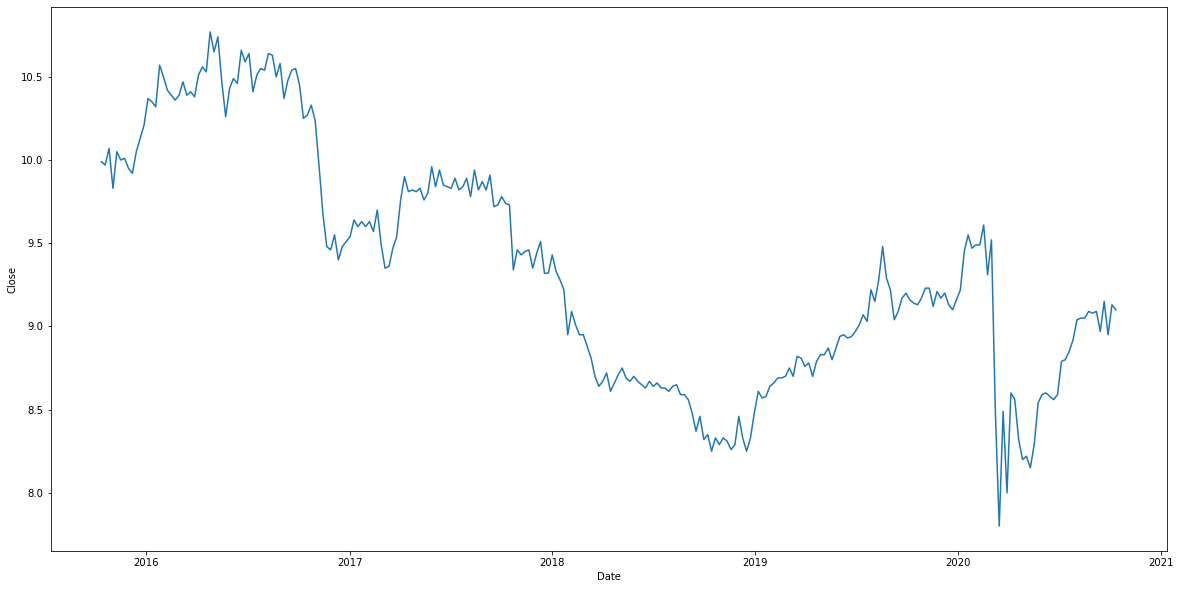

In [16]:
plt.figure(figsize=(20,10))
sns.lineplot(y=df['Close'], x=df.index)


## Decomposition Model

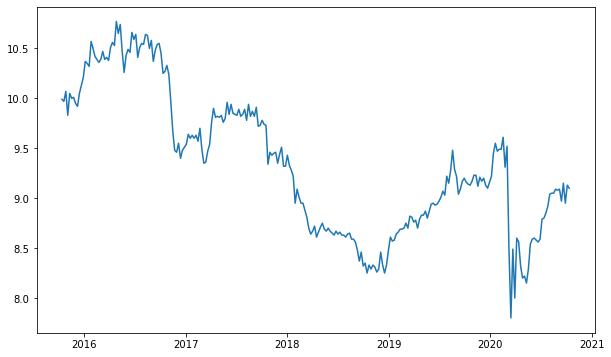

In [17]:
plt.rcParams['figure.figsize']=10,6
plt.plot(df)

In [18]:
df.astype({'Close': 'object'}).dtypes

Close    object
dtype: object

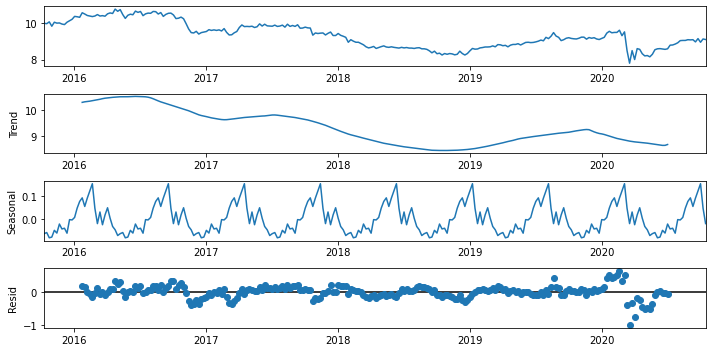

In [19]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']  =  10, 5

from statsmodels.tsa.seasonal import seasonal_decompose
decomposed_dataset = seasonal_decompose(df,model='additive', period = 30)          
figure  =  decomposed_dataset.plot()
plt.show()

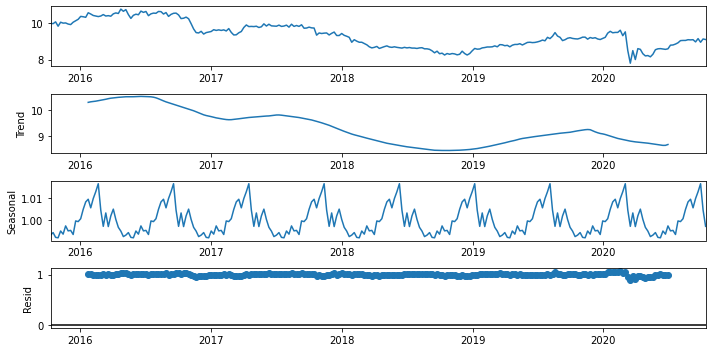

In [20]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']  =  10, 5

from statsmodels.tsa.seasonal import seasonal_decompose
decomposed_dataset = seasonal_decompose(df,model='multiplicative', period = 30)          
figure  =  decomposed_dataset.plot()
plt.show()

In [21]:
def rolling_means(time_series):
    rolmean  =  time_series.rolling(window = 53).mean()    #window size 12 denotes 12 months, giving rolling mean at yearly level
    rolstd  =  time_series.rolling(window = 53).std()
    #Plot rolling statistics

    #plt.figure(figsize=(8,8))
    rcParams['figure.figsize']  =  10, 5 

    orig  =  plt.plot(time_series, color = 'blue', label = 'Original')
    mean  =  plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std  =  plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)

In [22]:
def adf_test(time_series):
    from statsmodels.tsa.stattools import adfuller
    dftest  =  adfuller(time_series['Close'], autolag = 'AIC')

    dfoutput  =  pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]  =  value
    
    print('Results of Dickey Fuller Test:')    
    print(dfoutput)

In [23]:
def complete_sol(timeseries):
  rolling_means(timeseries)
  adf_test(timeseries)

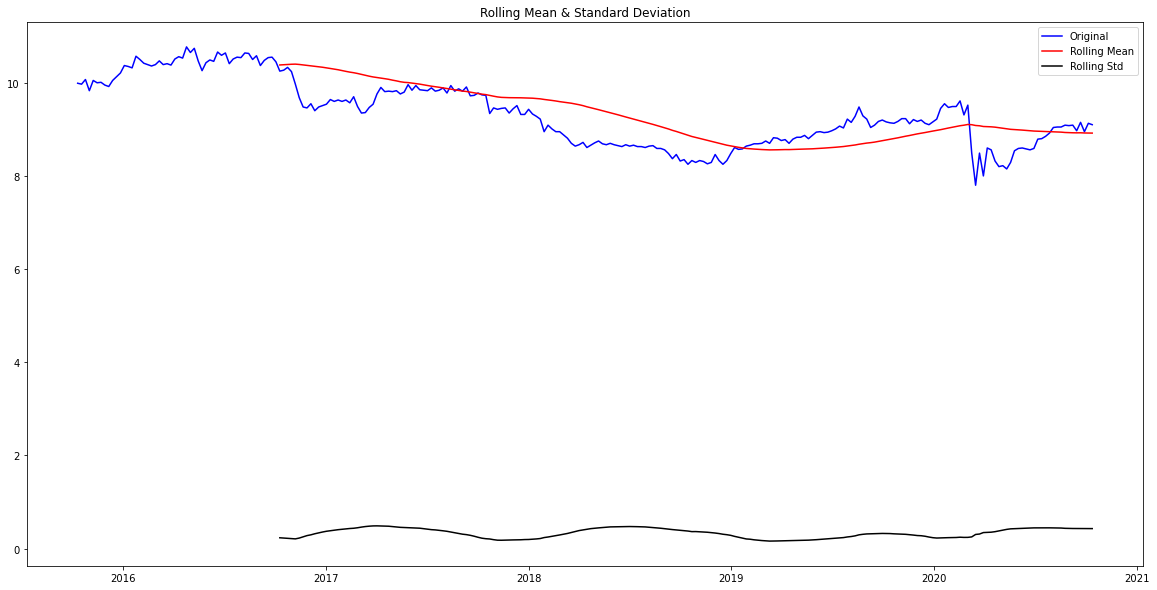

Results of Dickey Fuller Test:
Test Statistic                  -1.372361
p-value                          0.595452
#Lags Used                       4.000000
Number of Observations Used    257.000000
Critical Value (1%)             -3.456054
Critical Value (5%)             -2.872853
Critical Value (10%)            -2.572799
dtype: float64


In [24]:
plt.figure(figsize=(20,10))
complete_sol(df)

## Log Scale Transformation

In [25]:
df2=np.log(df)

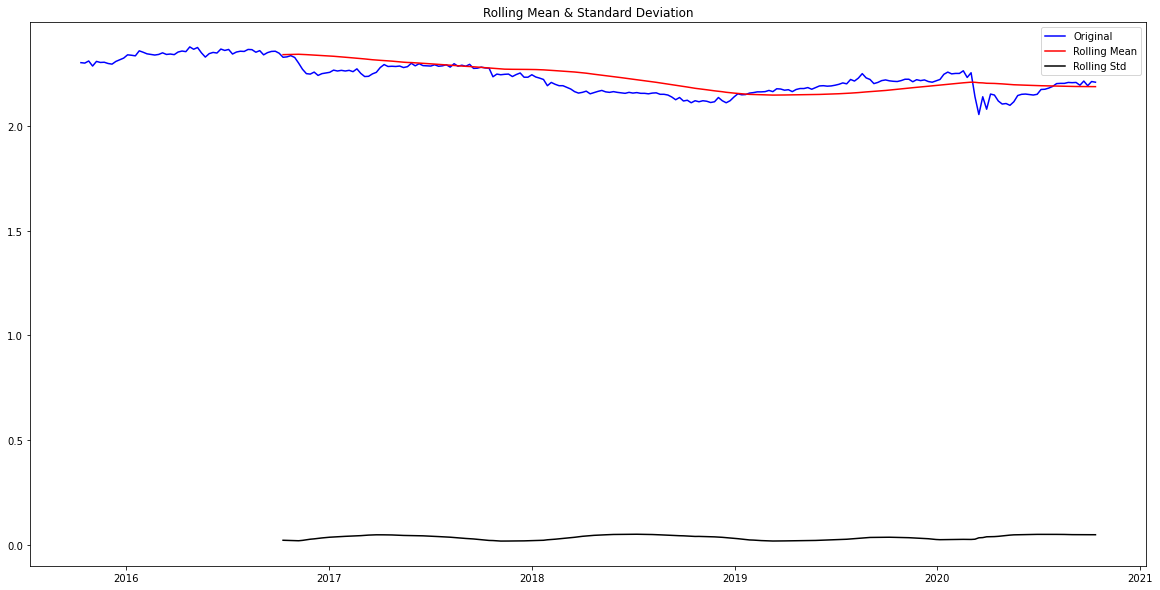

Results of Dickey Fuller Test:
Test Statistic                  -1.523226
p-value                          0.521992
#Lags Used                       8.000000
Number of Observations Used    253.000000
Critical Value (1%)             -3.456464
Critical Value (5%)             -2.873033
Critical Value (10%)            -2.572895
dtype: float64


In [26]:
plt.figure(figsize=(20,10))
complete_sol(df2)

## Log Scale - Moving Average Transformation - MA

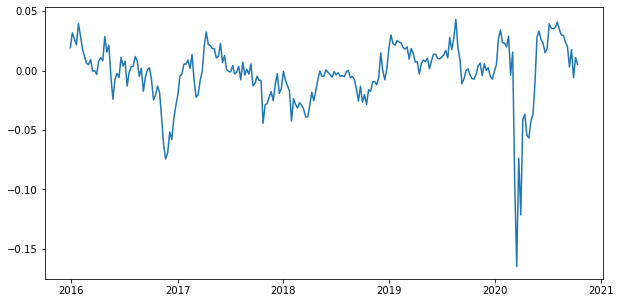

In [27]:
movingAverage  =  df2.rolling(window = 12).mean()
datasetLogScaleMinusMovingAverage  =  df2 - movingAverage
plt.plot(datasetLogScaleMinusMovingAverage)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace = True)

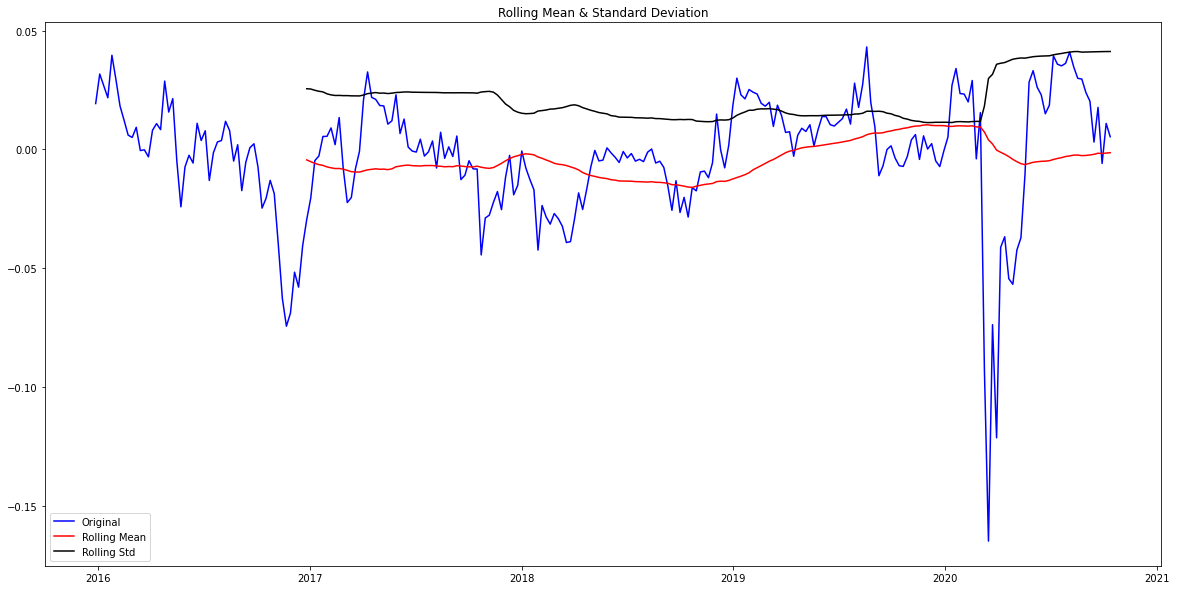

Results of Dickey Fuller Test:
Test Statistic                  -4.986837
p-value                          0.000024
#Lags Used                       7.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


In [28]:
plt.figure(figsize=(20,10))
complete_sol(datasetLogScaleMinusMovingAverage)

The data set is sattionary from MA. But let us explore some more models before we go for prediction

## Exponential Decay Transformation -Exp Smoothing

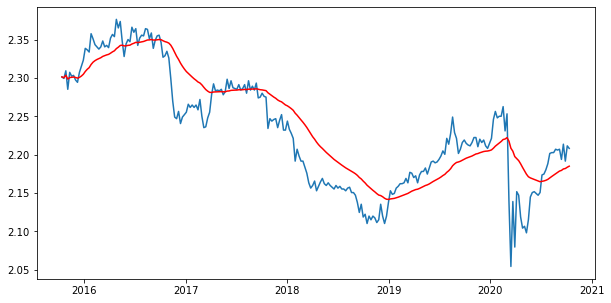

In [29]:
exponentialDecayWeightedAverage  =  df2.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(df2)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

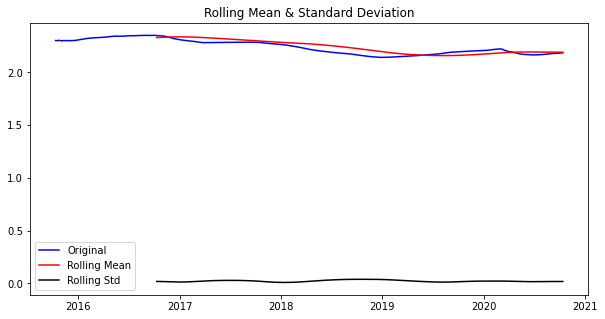

Results of Dickey Fuller Test:
Test Statistic                  -1.533405
p-value                          0.516926
#Lags Used                       5.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


In [30]:
complete_sol(exponentialDecayWeightedAverage)

## Differencing -Time Shift Transformation

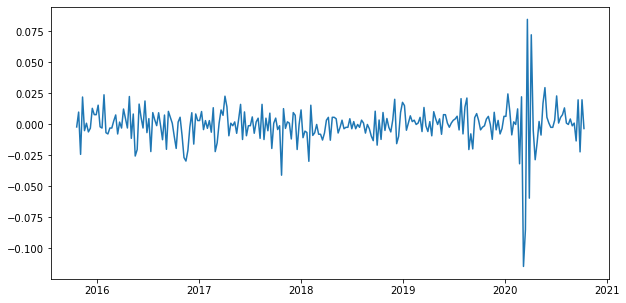

In [31]:
datasetLogDiffShifting  =  df2 - df2.shift()
plt.plot(datasetLogDiffShifting)

In [32]:
datasetLogDiffShifting.dropna(inplace=True)

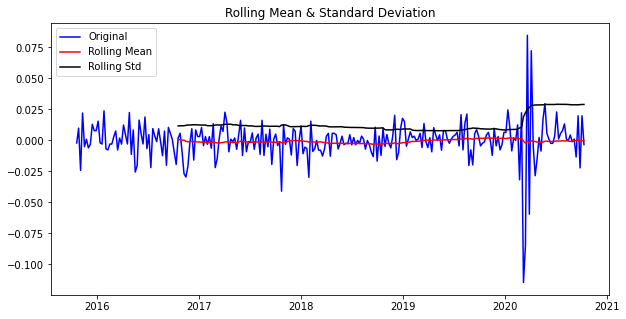

Results of Dickey Fuller Test:
Test Statistic                -5.692273e+00
p-value                        8.020380e-07
#Lags Used                     7.000000e+00
Number of Observations Used    2.530000e+02
Critical Value (1%)           -3.456464e+00
Critical Value (5%)           -2.873033e+00
Critical Value (10%)          -2.572895e+00
dtype: float64


In [33]:
complete_sol(datasetLogDiffShifting)

## Selecting Differencing Model

## FInding out p and q Values

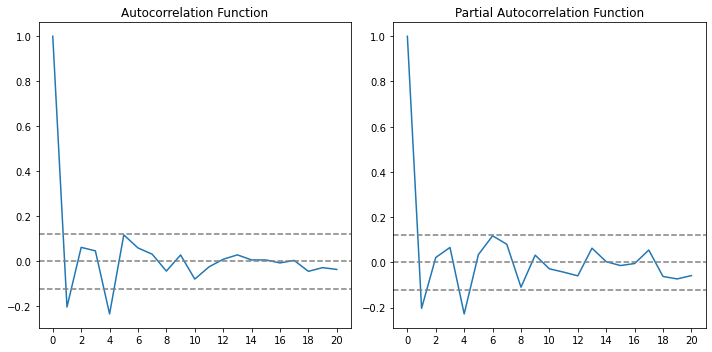

In [34]:
#ACF & PACF plots

from statsmodels.tsa.stattools import acf, pacf

lag_acf  =  acf(datasetLogDiffShifting, nlags = 20)
lag_pacf  =  pacf(datasetLogDiffShifting, nlags = 20, method = 'ols')
rcParams['figure.figsize']  =  10, 5
#Plot ACF:
plt.subplot(1,2,1)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'gray')
plt.xticks(np.arange(0,22,2))
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(1,2,2)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'gray')
plt.xticks(np.arange(0,22,2))
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

From the above plots we can say that the values of p and q are:
- p=1
- q=1

# Train test Split

In [35]:
len(datasetLogDiffShifting)

261

In [36]:
# Data Preparation
train, test = datasetLogDiffShifting[1:len(datasetLogDiffShifting)-12], datasetLogDiffShifting[len(datasetLogDiffShifting)-12:]
train.head()

,Close
Date,
2015-10-26,0.009980
2015-11-02,-0.024122
2015-11-09,0.022134
2015-11-16,-0.004988
2015-11-23,0.001000


In [37]:
print(len(train))
print(len(test))

248
12


In [38]:
train.head()

,Close
Date,
2015-10-26,0.009980
2015-11-02,-0.024122
2015-11-09,0.022134
2015-11-16,-0.004988
2015-11-23,0.001000


In [39]:
test.head()

,Close
Date,
2020-07-27,0.007878
2020-08-03,0.013363
2020-08-10,0.001106
2020-08-17,0.000000
2020-08-24,0.004410


# Modelling

### AR Model

In [40]:
from statsmodels.tsa.ar_model import AR
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)


Lag: 15
Coefficients: const       -0.001027
L1.Close    -0.167368
L2.Close     0.056585
L3.Close     0.024727
L4.Close    -0.278100
L5.Close     0.072659
L6.Close     0.127033
L7.Close     0.032501
L8.Close    -0.126253
L9.Close     0.042241
L10.Close   -0.049797
L11.Close   -0.084103
L12.Close   -0.041272
L13.Close    0.056276
L14.Close    0.004161
L15.Close   -0.001583
dtype: float64


In [41]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions.head()

2020-07-27   -0.003382
2020-08-03   -0.008968
2020-08-10   -0.001450
2020-08-17   -0.000491
2020-08-24    0.001989
Freq: W-MON, dtype: float64

In [42]:
predictions.set_axis(test.index, inplace=True)

In [43]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test.iloc[i]))

predicted=-0.003382, expected=0.007878
predicted=-0.008968, expected=0.013363
predicted=-0.001450, expected=0.001106
predicted=-0.000491, expected=0.000000
predicted=0.001989, expected=0.004410
predicted=-0.000487, expected=-0.001101
predicted=-0.000349, expected=0.001101
predicted=-0.004312, expected=-0.013289
predicted=-0.003015, expected=0.019868
predicted=-0.000752, expected=-0.022100
predicted=-0.000117, expected=0.019912
predicted=0.000704, expected=-0.003291


## Finding RMSE

Test RMSE: 0.013


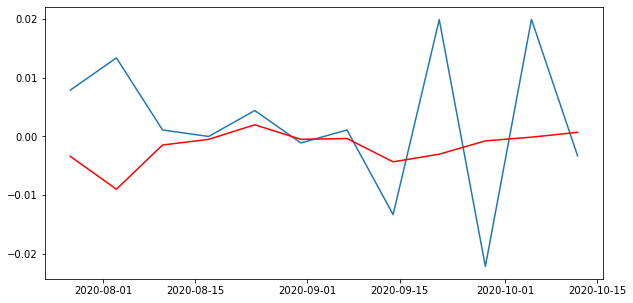

In [44]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)
# plot results

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Plotting AR model


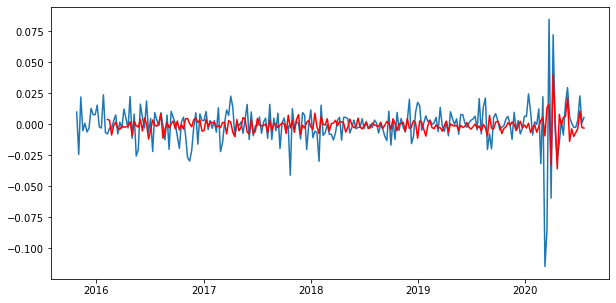

In [45]:
plt.plot(train)
plt.plot(model_fit.fittedvalues, color = 'red')
print('Plotting AR model')

## ARMA Model

In [46]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(train,order=(1,1))
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 1
Coefficients: const         -0.000491
ar.L1.Close   -0.228212
ma.L1.Close    0.036984
dtype: float64


In [47]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions.set_axis(test.index, inplace=True)
predictions.head()


Date
2020-07-27   -0.001664
2020-08-03   -0.000224
2020-08-10   -0.000553
2020-08-17   -0.000478
2020-08-24   -0.000495
dtype: float64

In [48]:
for i in range(len(predictions)):
    print(i,'predicted=%f, expected=%f' % (predictions[i], test.iloc[i]))

0 predicted=-0.001664, expected=0.007878
1 predicted=-0.000224, expected=0.013363
2 predicted=-0.000553, expected=0.001106
3 predicted=-0.000478, expected=0.000000
4 predicted=-0.000495, expected=0.004410
5 predicted=-0.000491, expected=-0.001101
6 predicted=-0.000492, expected=0.001101
7 predicted=-0.000491, expected=-0.013289
8 predicted=-0.000492, expected=0.019868
9 predicted=-0.000491, expected=-0.022100
10 predicted=-0.000491, expected=0.019912
11 predicted=-0.000491, expected=-0.003291


### Finding RMSE

Test RMSE: 0.012


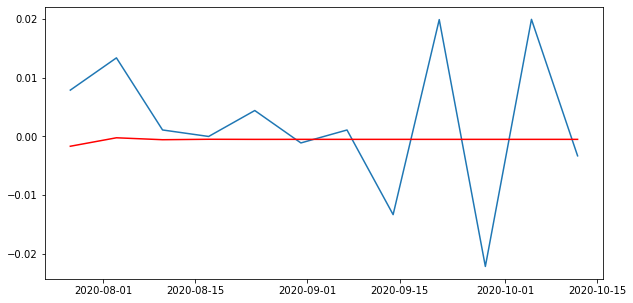

In [49]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)
# plot results

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Plotting ARMA model


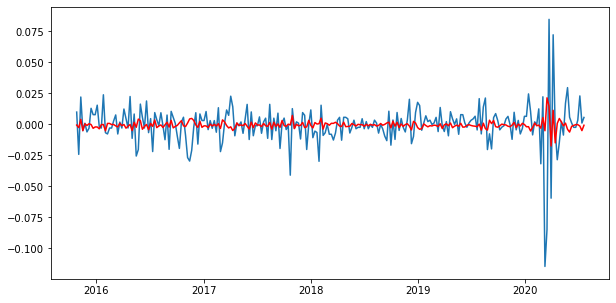

In [50]:
plt.plot(train)
plt.plot(model_fit.fittedvalues, color = 'red')
print('Plotting ARMA model')

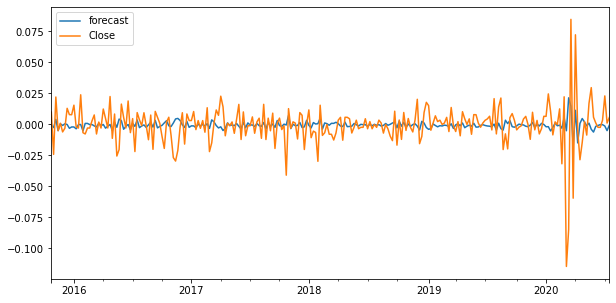

In [51]:
plot = model_fit.plot_predict()

# ARMIA Model

In [52]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(datasetLogDiffShifting,order=(1,0,1))
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 1
Coefficients: const         -0.000491
ar.L1.Close   -0.228212
ma.L1.Close    0.036984
dtype: float64


In [53]:
results_ARIMA = model.fit()

In [54]:
results_ARIMA.fittedvalues.head()

Date
2015-10-19   -0.000354
2015-10-26   -0.000019
2015-11-02   -0.002445
2015-11-09    0.004532
2015-11-16   -0.005144
dtype: float64

## RMSE

In [55]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
error = mean_squared_error(datasetLogDiffShifting, results_ARIMA.fittedvalues)
print('Test MSE: %.6f' % error)

Test MSE: 0.000249


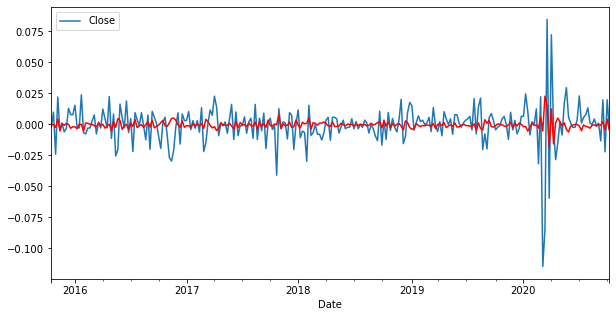

In [56]:
datasetLogDiffShifting.plot()
results_ARIMA.fittedvalues.plot(color='red')

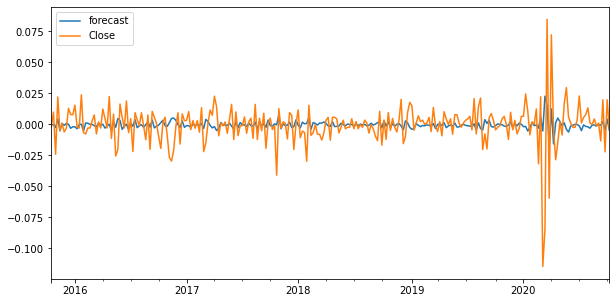

In [57]:
fitted_values = results_ARIMA.plot_predict()

In [58]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2015-10-19   -0.000354
2015-10-26   -0.000019
2015-11-02   -0.002445
2015-11-09    0.004532
2015-11-16   -0.005144
dtype: float64

In [59]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2015-10-19   -0.000354
2015-10-26   -0.000372
2015-11-02   -0.002817
2015-11-09    0.001715
2015-11-16   -0.003428
dtype: float64

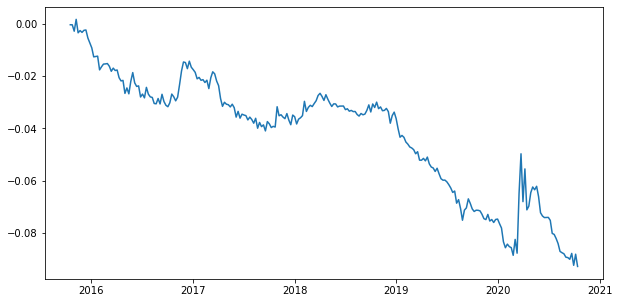

In [60]:
plt.plot(predictions_ARIMA_diff_cumsum)

## Adding Trend Back

In [61]:
df2['Close'].head()

Date
2015-10-12    2.301585
2015-10-19    2.299581
2015-10-26    2.309561
2015-11-02    2.285439
2015-11-09    2.307573
Name: Close, dtype: float64

In [62]:
predictions_ARIMA_log = pd.Series(df2['Close'].iloc[0], index=datasetLogDiffShifting.index)

In [63]:
predictions_ARIMA_log.head()

Date
2015-10-19    2.301585
2015-10-26    2.301585
2015-11-02    2.301585
2015-11-09    2.301585
2015-11-16    2.301585
dtype: float64

In [64]:
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

In [65]:
predictions_ARIMA_log.head()

Date
2015-10-19    2.301231
2015-10-26    2.301212
2015-11-02    2.298768
2015-11-09    2.303300
2015-11-16    2.298156
dtype: float64

In [66]:
reverted_back_prediction = pd.DataFrame(np.exp(predictions_ARIMA_log))
reverted_back_prediction.head()

,0
Date,
2015-10-19,9.986469
2015-10-26,9.986282
2015-11-02,9.961899
2015-11-09,10.007149
2015-11-16,9.955809


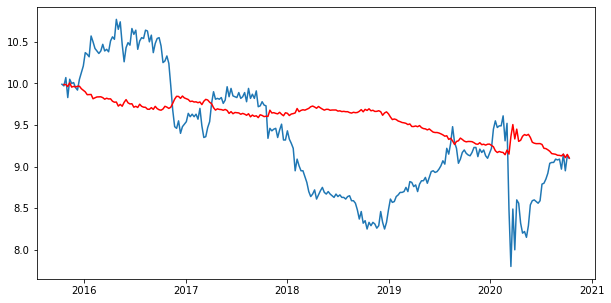

In [67]:
from matplotlib import pyplot
pyplot.plot(df)
pyplot.plot(reverted_back_prediction, color='red')
pyplot.show()

In [68]:
df2.columns = ['Price in logscale']
reverted_back_prediction.columns = ['ARIMA Predicted Price']
datasetLogDiffShifting.columns = ['Price after log diff shifting']

In [69]:
df_final = pd.concat([df,df2, datasetLogDiffShifting,reverted_back_prediction], axis=1, sort=False)
df_final.tail()

,Close,Price in logscale,Price after log diff shifting,ARIMA Predicted Price
Date,,,,
2020-09-14,8.97,2.193886,-0.013289,9.128964
2020-09-21,9.15,2.213754,0.019868,9.149593
2020-09-28,8.95,2.191654,-0.022100,9.107983
2020-10-05,9.13,2.211566,0.019912,9.146763
2020-10-12,9.10,2.208274,-0.003291,9.104039


## Prediction for next one year

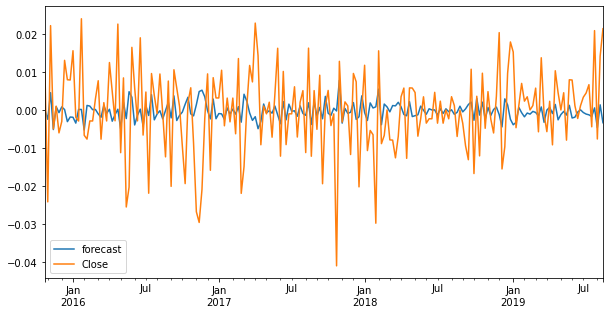

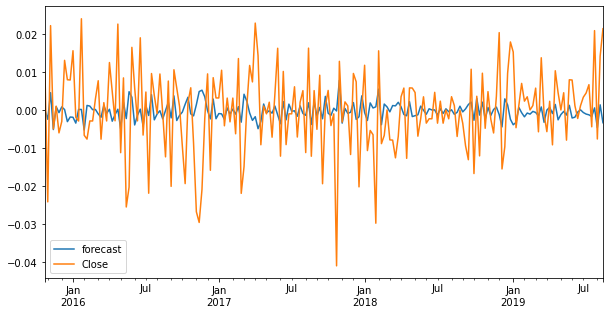

In [70]:
results_ARIMA.plot_predict(1,200) 

In [71]:
one_yr_forecast = results_ARIMA.predict(start=len(datasetLogDiffShifting),end = len(datasetLogDiffShifting) + 53 ) 

In [72]:
len(datasetLogDiffShifting)

261

In [73]:
predictions_ARIMA_diff = pd.Series(one_yr_forecast, copy=True)
predictions_ARIMA_diff.head()

2020-10-19    0.000485
2020-10-26   -0.000570
2020-11-02   -0.000298
2020-11-09   -0.000368
2020-11-16   -0.000350
Freq: W-MON, dtype: float64

In [74]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

2020-10-19    0.000485
2020-10-26   -0.000085
2020-11-02   -0.000383
2020-11-09   -0.000751
2020-11-16   -0.001100
Freq: W-MON, dtype: float64

In [75]:
predictions_ARIMA_log = pd.Series(df2['Price in logscale'].iloc[-1], index=predictions_ARIMA_diff.index)
predictions_ARIMA_log.head()

2020-10-19    2.208274
2020-10-26    2.208274
2020-11-02    2.208274
2020-11-09    2.208274
2020-11-16    2.208274
2020-11-23    2.208274
2020-11-30    2.208274
2020-12-07    2.208274
2020-12-14    2.208274
2020-12-21    2.208274
2020-12-28    2.208274
2021-01-04    2.208274
2021-01-11    2.208274
2021-01-18    2.208274
2021-01-25    2.208274
2021-02-01    2.208274
2021-02-08    2.208274
2021-02-15    2.208274
2021-02-22    2.208274
2021-03-01    2.208274
2021-03-08    2.208274
2021-03-15    2.208274
2021-03-22    2.208274
2021-03-29    2.208274
2021-04-05    2.208274
2021-04-12    2.208274
2021-04-19    2.208274
2021-04-26    2.208274
2021-05-03    2.208274
2021-05-10    2.208274
2021-05-17    2.208274
2021-05-24    2.208274
2021-05-31    2.208274
2021-06-07    2.208274
2021-06-14    2.208274
2021-06-21    2.208274
2021-06-28    2.208274
2021-07-05    2.208274
2021-07-12    2.208274
2021-07-19    2.208274
2021-07-26    2.208274
2021-08-02    2.208274
2021-08-09    2.208274
2021-08-16 

In [76]:
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

2020-10-19    2.208760
2020-10-26    2.208190
2020-11-02    2.207892
2020-11-09    2.207524
2020-11-16    2.207174
Freq: W-MON, dtype: float64

In [77]:
reverted_back_prediction = pd.DataFrame(np.exp(predictions_ARIMA_log))
reverted_back_prediction.head()

,0
2020-10-19,9.104416
2020-10-26,9.099227
2020-11-02,9.096520
2020-11-09,9.093173
2020-11-16,9.089993


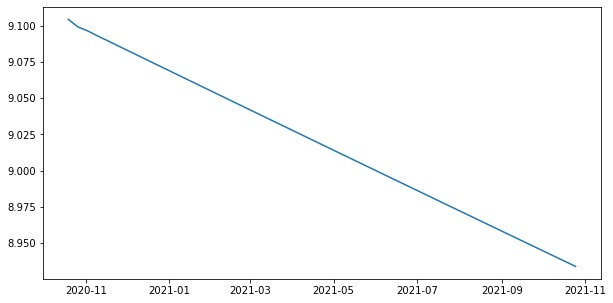

In [78]:
plt.plot(reverted_back_prediction)

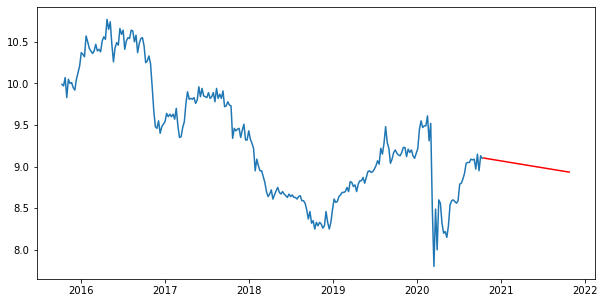

In [79]:
from matplotlib import pyplot
pyplot.plot(df)
pyplot.plot(reverted_back_prediction, color='red')
pyplot.show()